# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
# Correct the URL and API Key Initialization
base_url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "06d373084271d2ebcfbd266ca7e3bfd7"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={api_key}&units=imperial"  
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(f"Error: {e}")  # Printing the specific error can be helpful for debugging
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | rio grande
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | nizao
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | susuman
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | ikongo
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | paoua
Processing Record 17 of Set 1 | st. john's
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | veraval
Processing Record 20 of Set 1 | waurn ponds
Processing Record 21 of Set 1 | sao jose da coroa grande
Processing Record 22 of Set 1 | holualoa

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,35.26,80,0,2.30,AR,1691542849
1,edinburgh of the seven seas,-37.0676,-12.3116,52.84,85,100,25.55,SH,1691542578
2,avarua,-21.2078,-159.7750,75.25,64,40,11.50,CK,1691542857
3,rio grande,-32.0350,-52.0986,57.31,75,100,13.94,BR,1691542857
4,port-aux-francais,-49.3500,70.2167,34.21,75,10,17.49,TF,1691542857


In [57]:
import os

# Check if directory exists. If not, create it.
if not os.path.exists('output_data'):
    os.makedirs('output_data')


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,35.26,80,0,2.30,AR,1691542849
1,edinburgh of the seven seas,-37.0676,-12.3116,52.84,85,100,25.55,SH,1691542578
2,avarua,-21.2078,-159.7750,75.25,64,40,11.50,CK,1691542857
3,rio grande,-32.0350,-52.0986,57.31,75,100,13.94,BR,1691542857
4,port-aux-francais,-49.3500,70.2167,34.21,75,10,17.49,TF,1691542857


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [60]:
print(city_data_df.columns)


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


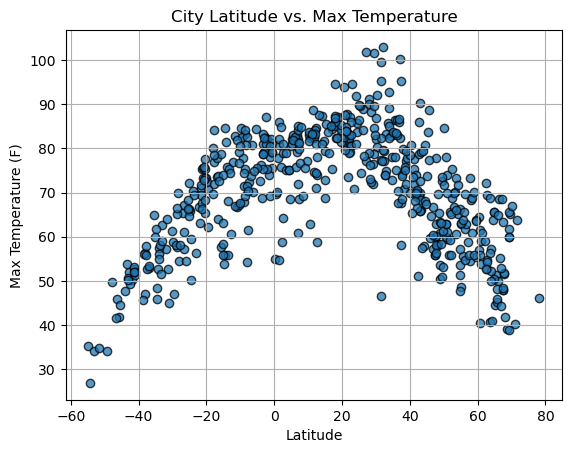

In [61]:
import matplotlib.pyplot as plt

# 1. Extract the data
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# 2. Create the scatter plot
plt.scatter(latitude, temperature, edgecolors='black', alpha=0.75)

# 3. Style and label
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# 4. Save the figure
plt.savefig("output_data/Fig1.png")

# 5. Show the plot
plt.show()


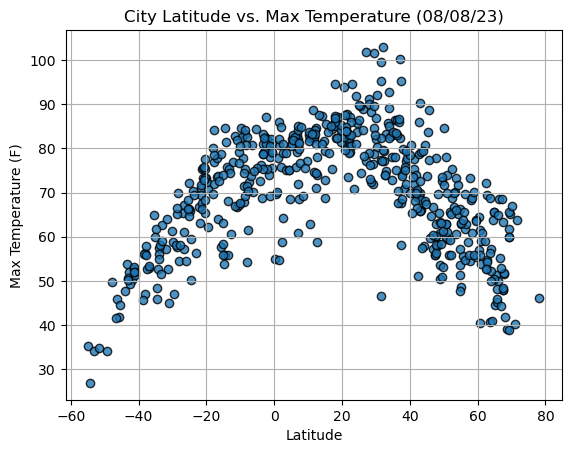

In [68]:
# Build scatter plot for latitude vs. temperature
latitudes = [data['Lat'] for data in city_data]
max_temps = [data['Max Temp'] for data in city_data]

# Incorporate the other graph properties
plt.scatter(latitudes, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

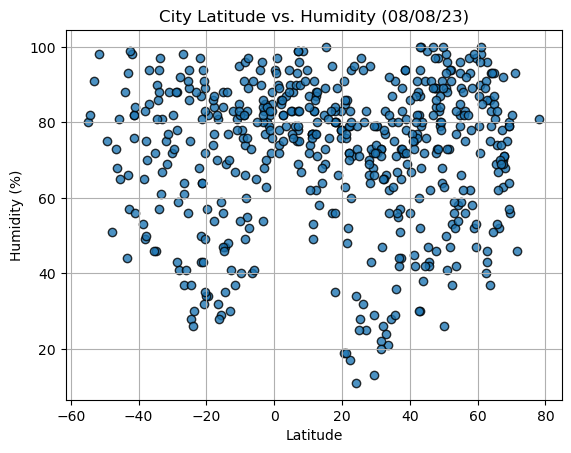

In [69]:
# Build the scatter plots for latitude vs. humidity
latitudes = [data['Lat'] for data in city_data]
humidity = [data['Humidity'] for data in city_data]

# Incorporate the other graph properties
plt.scatter(latitudes, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

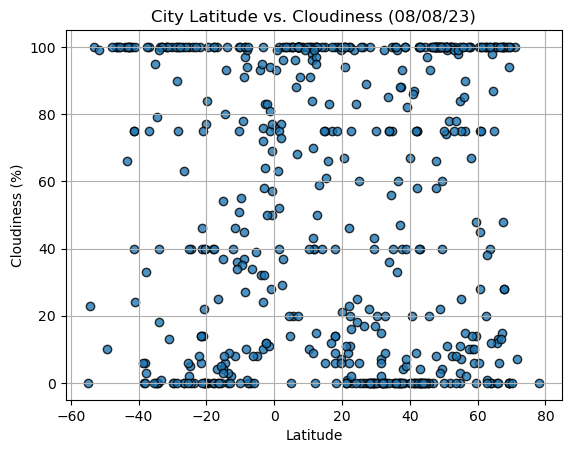

In [70]:
# Build the scatter plots for latitude vs. cloudiness

latitudes = [data['Lat'] for data in city_data]
cloudiness = [data['Cloudiness'] for data in city_data]
plt.scatter(latitudes, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

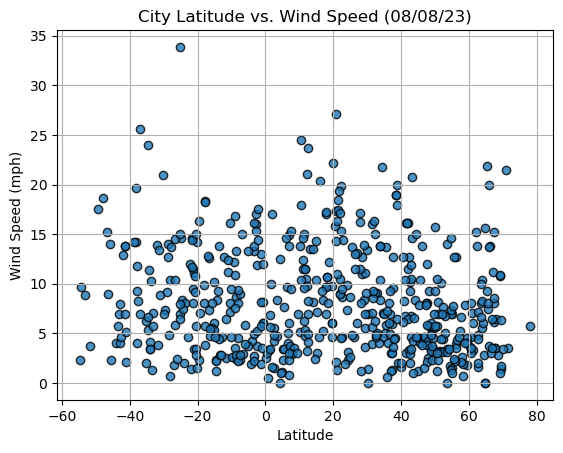

In [72]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [data['Lat'] for data in city_data]
wind_speeds = [data['Wind Speed'] for data in city_data]

# Incorporate the other graph properties
plt.scatter(latitudes, wind_speeds, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates, filename):
    """
    Function to create a scatter plot, fit a linear regression model, and display both.
    
    Parameters:
    - x_values: List or array of x-values for the scatter plot.
    - y_values: List or array of y-values for the scatter plot.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - title: Title of the plot.
    - text_coordinates: A tuple indicating where to display the equation of the line.
    - filename: Name of the file where the plot should be saved.
    """
    
    # Compute the linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue}")
    
    # Save the figure
    plt.savefig(filename)
    
    # Display the plot
    plt.show()


In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_df = pd.DataFrame(city_data)
northern_hemi_df = city_df[city_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,nizao,18.2500,-70.2000,82.47,80,0,10.67,DO,1691542857
9,aasiaat,68.7098,-52.8699,39.13,75,100,2.84,GL,1691542858
10,susuman,62.7833,148.1667,52.79,46,100,1.63,RU,1691542858
14,iqaluit,63.7506,-68.5145,40.73,86,40,8.05,CA,1691542858
15,paoua,7.2427,16.4406,68.59,96,100,3.56,CF,1691542858


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6625754762856113


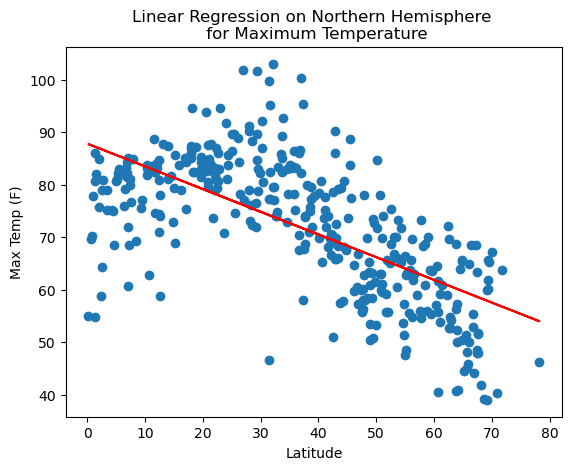

In [80]:
# Linear regression on Northern Hemisphere
north_latitudes = northern_hemi_df["Lat"]
north_max_temps = northern_hemi_df["Max Temp"]
plot_linear_regression(north_latitudes, 
                       north_max_temps, 
                       'Latitude', 
                       'Max Temp (F)', 
                       'Linear Regression on Northern Hemisphere \n for Maximum Temperature', 
                       (10, -40), 
                       "output_data/Northern_Lat_vs_MaxTemp.png")


The r-value is: 0.8444473068482249


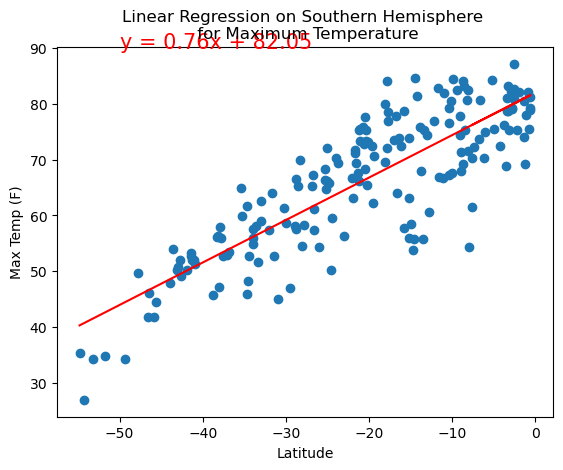

In [81]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_df[city_df["Lat"] < 0]
south_latitudes = southern_hemi_df["Lat"]
south_max_temps = southern_hemi_df["Max Temp"]
plot_linear_regression(south_latitudes, 
                       south_max_temps, 
                       'Latitude', 
                       'Max Temp (F)', 
                       'Linear Regression on Southern Hemisphere \n for Maximum Temperature', 
                       (-50, 90), 
                       "output_data/Southern_Lat_vs_MaxTemp.png")


**Discussion about the linear relationship:** There is a corolation of temperature and latitude. The closer you are to the center the warmer it is

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.059552799635205156


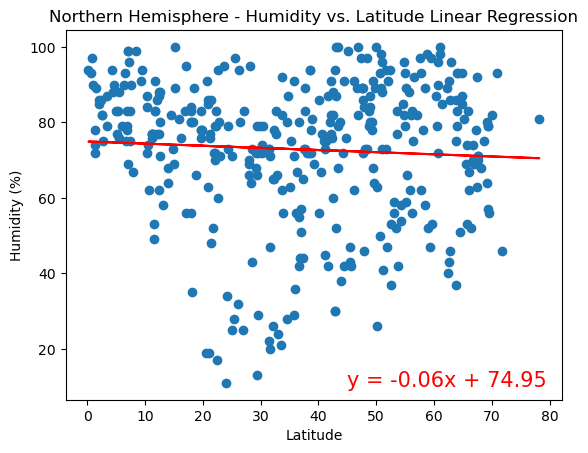

In [82]:
# Northern Hemisphere
north_humidity = northern_hemi_df["Humidity"]

plot_linear_regression(north_latitudes, 
                       north_humidity, 
                       'Latitude', 
                       'Humidity (%)', 
                       'Northern Hemisphere - Humidity vs. Latitude Linear Regression', 
                       (45, 10), 
                       "output_data/Northern_Lat_vs_Humidity.png")



The r-value is: -0.011773702034394503


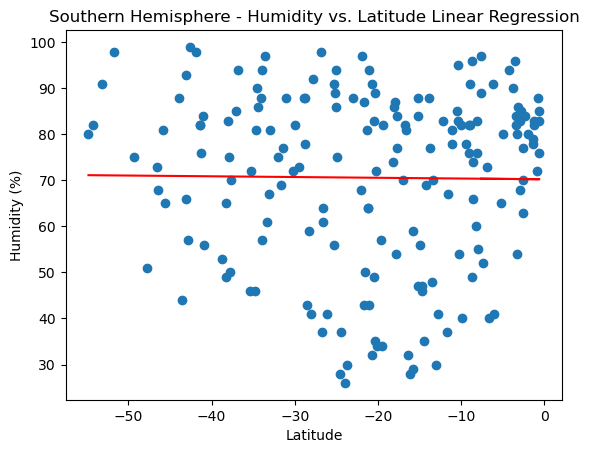

In [83]:
# Southern Hemisphere
south_humidity = southern_hemi_df["Humidity"]

plot_linear_regression(south_latitudes, 
                       south_humidity, 
                       'Latitude', 
                       'Humidity (%)', 
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression', 
                       (-50, 20), 
                       "output_data/Southern_Lat_vs_Humidity.png")


**Discussion about the linear relationship:** Humidity in tropical areas like the center seems to have higher humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0683677868607078


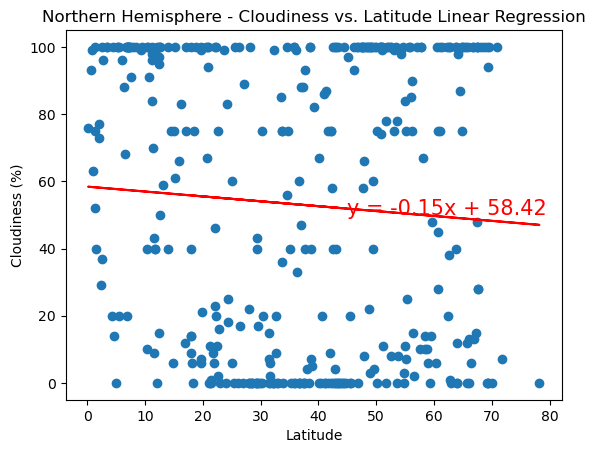

In [84]:
# Northern Hemisphere
north_cloudiness = northern_hemi_df["Cloudiness"]

plot_linear_regression(north_latitudes, 
                       north_cloudiness, 
                       'Latitude', 
                       'Cloudiness (%)', 
                       'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', 
                       (45, 50), 
                       "output_data/Northern_Lat_vs_Cloudiness.png")


The r-value is: -0.14337962581343294


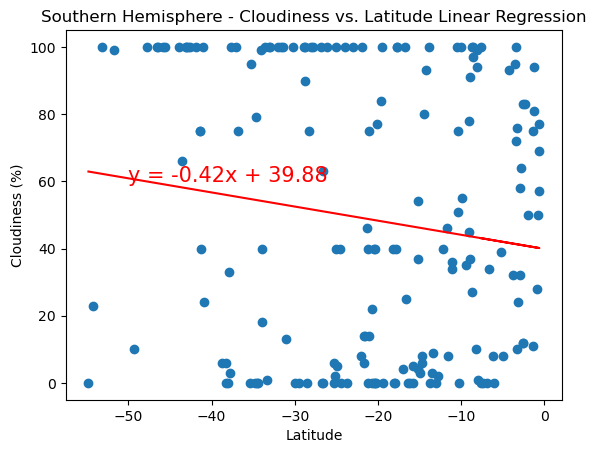

In [85]:
# Southern Hemisphere
south_cloudiness = southern_hemi_df["Cloudiness"]

plot_linear_regression(south_latitudes, 
                       south_cloudiness, 
                       'Latitude', 
                       'Cloudiness (%)', 
                       'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', 
                       (-50, 60), 
                       "output_data/Southern_Lat_vs_Cloudiness.png")


**Discussion about the linear relationship:** The reression does not show a strong correlation

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1565257811634645


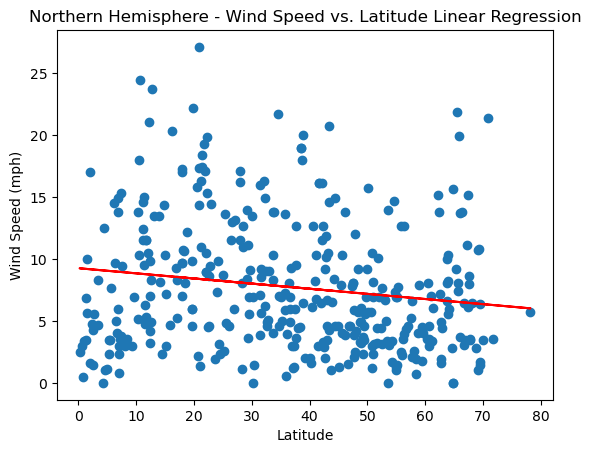

In [87]:
# Northern Hemisphere
north_wind_speed = northern_hemi_df["Wind Speed"]

plot_linear_regression(north_latitudes, 
                       north_wind_speed, 
                       'Latitude', 
                       'Wind Speed (mph)', 
                       'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', 
                       (0, 30), 
                       "output_data/Northern_Lat_vs_WindSpeed.png")


The r-value is: -0.08437413997322404


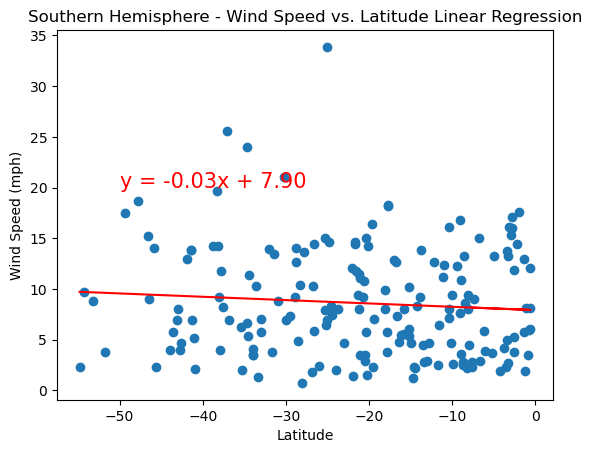

In [86]:
# Southern Hemisphere
south_wind_speed = southern_hemi_df["Wind Speed"]

plot_linear_regression(south_latitudes, 
                       south_wind_speed, 
                       'Latitude', 
                       'Wind Speed (mph)', 
                       'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', 
                       (-50, 20), 
                       "output_data/Southern_Lat_vs_WindSpeed.png")


**Discussion about the linear relationship:** The regression show there is a general trend but not a strong relationshiop